In [1]:
import pandas as pd

cv_df = pd.read_parquet('./data/clean/cv.parquet')
vacancies_df = pd.read_parquet('./data/clean/vacancies.parquet')

cv_df.head()
vacancies_df.head()

,id,stateRegionCode,vacancyName,codeProfession,codeProfessionalSphere,professionalSphereName,vacancyAddress,vacancyAddressHouse,vacancyAddressAdditionalInfo,geo,...,hireDate,workPlace,medicalCertificate,scheduleTypeComment,benefitDetails,trainingDays,shift,medicalDocument,benefit,conditions
9,1bdfbcb0-f9b1-11ef-9ae2-25abf1fceba2,7700000000000,Продавец-кассир,None,Sales,"Продажи, закупки, снабжение, торговля","Город Москва, 1-й Грайвороновский проезд",None,"Россия, г Москва, 1-й Грайвороновский проезд, ...","{""latitude"": 55.720874, ""longitude"": 37.725595}",...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,None
21,464a0d88-c5b7-11ef-96bd-29eee561bb17,7700000000000,Главный специалист направления PDM систем,209204,InformationTechnology,"Информационные технологии, телекоммуникации, с...","Город Москва, Озерковская набережная, 30",30,ООО АЛРОСА Информационные технологии,"{""latitude"": 55.738019, ""longitude"": 37.638}",...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые
25,23e60dd5-b130-11ee-9b60-cb26dff57dd7,7700000000000,Экономист,277409,AccountingTaxesManagement,"Бухгалтерия, налоги, управленческий учет","Город Москва, Хромова улица, дом 24",дом 24,None,"{""latitude"": 55.799973, ""longitude"": 37.719998}",...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Оптимальные
33,1f58a7f8-ddf3-11ef-9bbd-d549be31d974,7700000000000,Главный специалист отдела поддержки бизнеса,208894,InformationTechnology,"Информационные технологии, телекоммуникации, с...","Город Москва, 1812 года улица, 14",14,ООО АЛРОСА Информационные технологии,"{""latitude"": 55.742924, ""longitude"": 37.520132}",...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые
40,4bc2c13a-f7e9-11ef-9741-e7d0d2cf29b1,7700000000000,Врач-офтальмолог,204484,Medicine,Здравоохранение и социальное обеспечение,"Город Москва, Трехгорный Вал улица, дом 6А",дом 6А,None,"{""latitude"": 55.758884, ""longitude"": 37.56079}",...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые


# Гистограммы и диаграммы рассеяния

In [2]:
def find_name(code, json_data):
    for item in json_data:
        try:
            if item['code'] == code:
                    if (item['type'] in ['int', 'bool', 'boolean']):
                        return item['name'], item['type']
        except:
            return False
    return False


100%|██████████| 80/80 [00:02<00:00, 35.16it/s]


Rendering 18


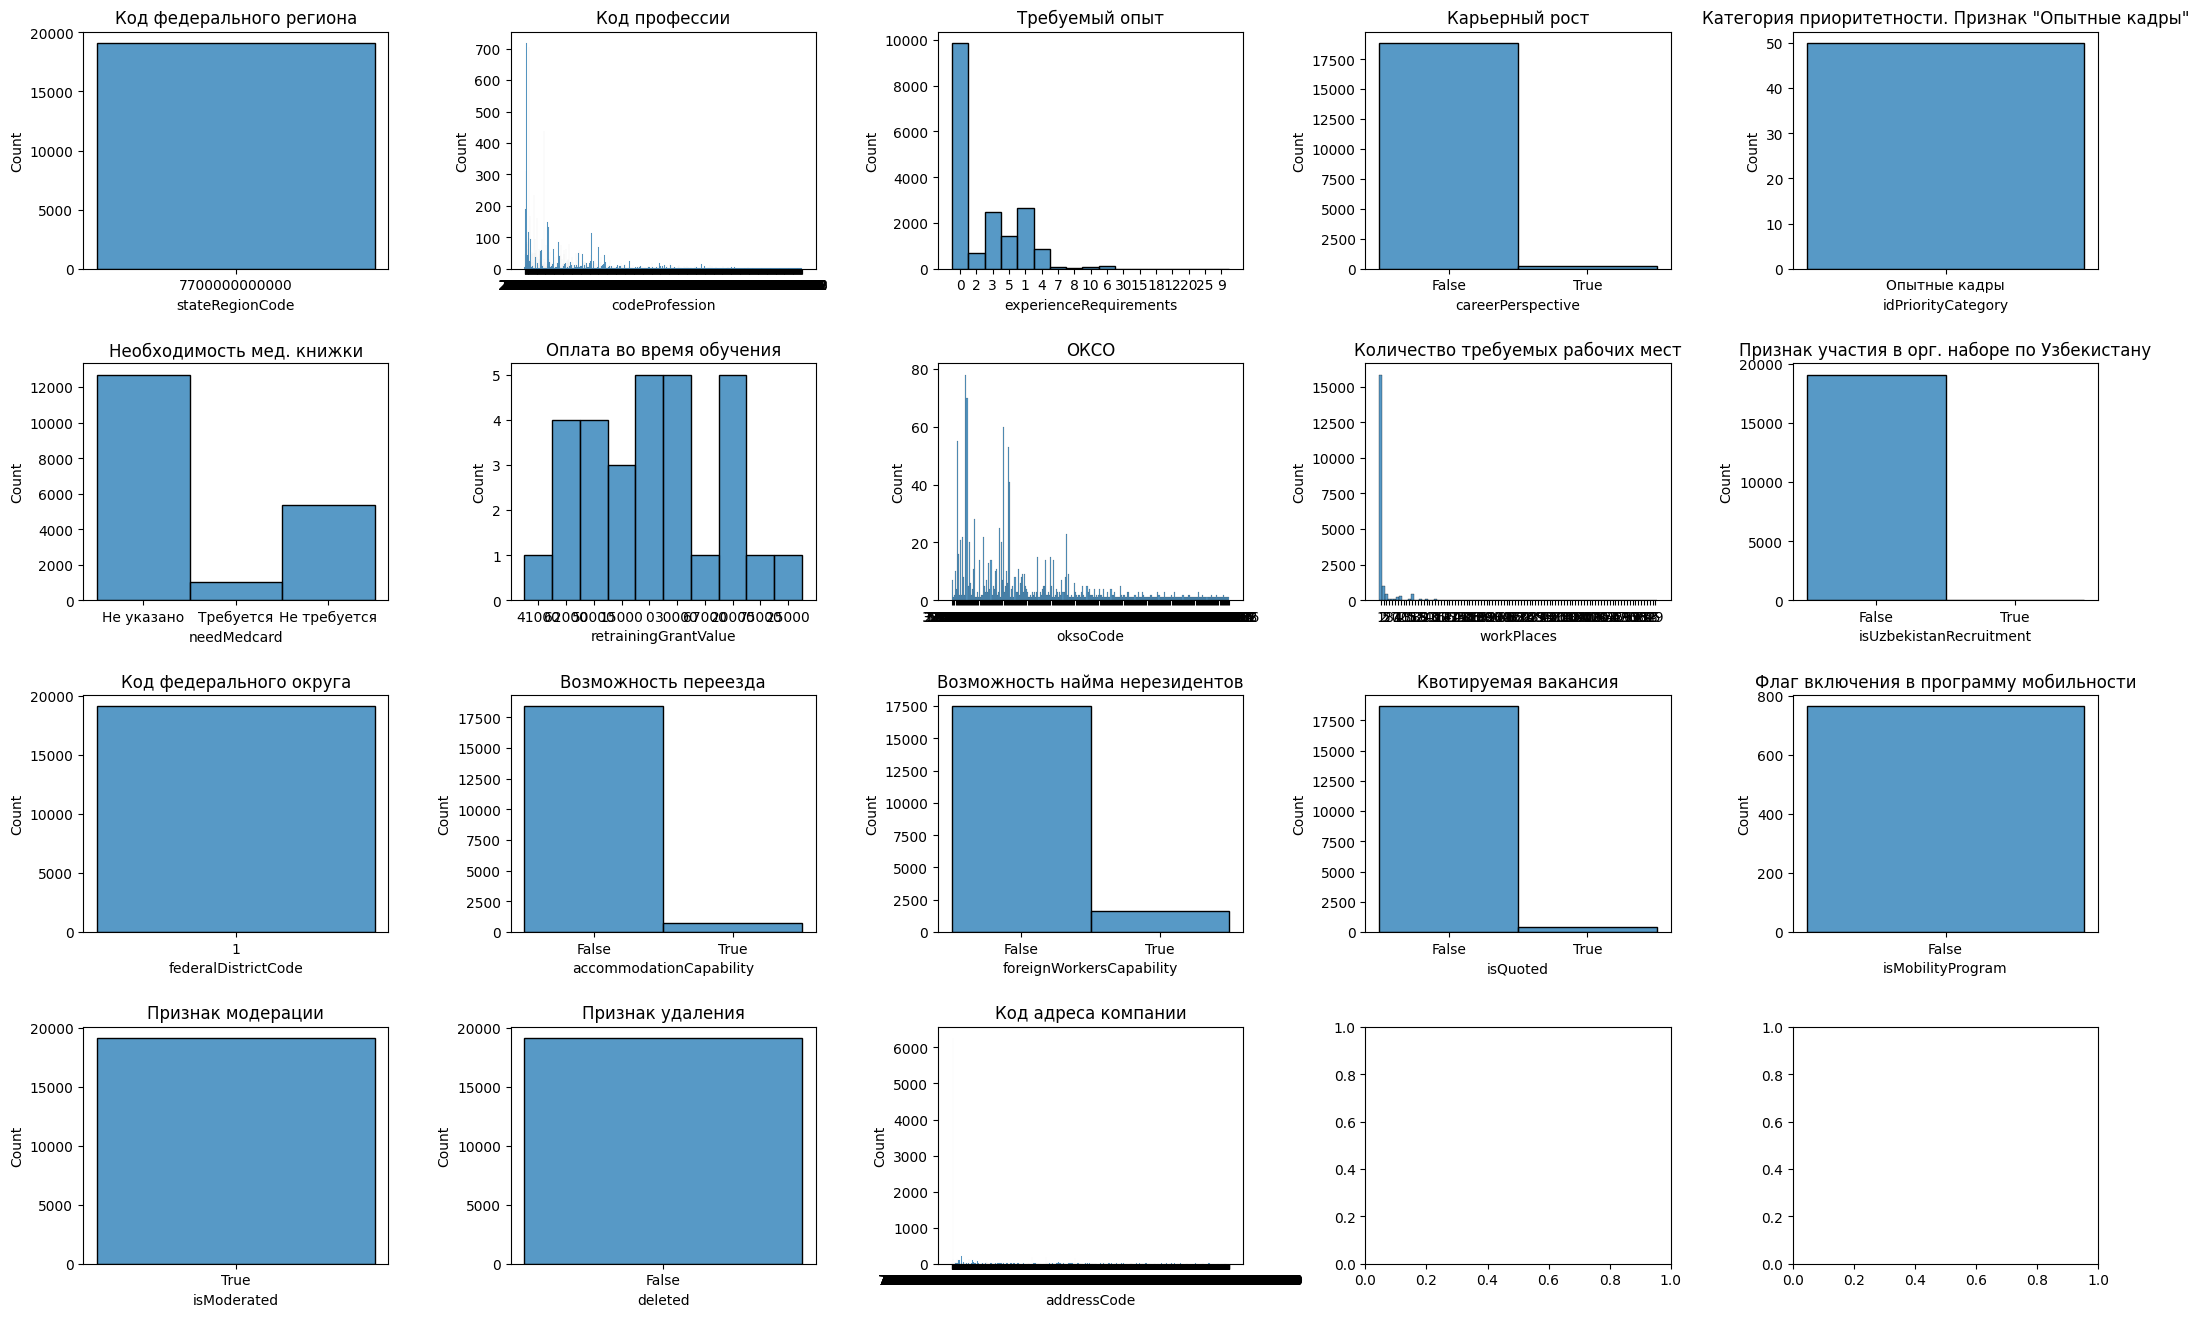

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
from tqdm import tqdm

fig, axs = plt.subplots(4, 5, figsize=(26,16))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

with open('./data/vacancies_attributes.json', 'r') as f:
    attr_data = json.load(f)

    i = 0
    for attr in tqdm(list(vacancies_df.columns)):
        if (not find_name(attr, attr_data)):
            continue

        attr_name, attr_type = find_name(attr, attr_data)
        sns.histplot(vacancies_df[attr], ax=axs[i // 5][i % 5])
        axs[i // 5][i % 5].set_title(attr_name)
        i += 1

print('Rendering', i)

Убираем колонки, в которых все значения одинаковые

In [6]:
clean_vacancies_df = vacancies_df.drop(['stateRegionCode', 'federalDistrictCode', 'isModerated', 'deleted'], axis=1)

In [12]:
clean_vacancies_df.columns

Index(['id', 'vacancyName', 'codeProfession', 'codeProfessionalSphere',
       'professionalSphereName', 'vacancyAddress', 'vacancyAddressHouse',
       'vacancyAddressAdditionalInfo', 'salary', 'socialProtecteds',
       'languageKnowledge', 'busyType', 'educationRequirements', 'hardSkills',
       'softSkills', 'skills', 'typicalPosition', 'experienceRequirements',
       'scheduleType', 'premium', 'otherVacancyBenefit', 'careerPerspective',
       'codeExternalSystem', 'idPriorityCategory', 'needMedcard',
       'requiredСertificates', 'requiredDriveLicense', 'retrainingCapability',
       'retrainingСondition', 'retrainingGrantValue', 'transportCompensation',
       'contactPerson', 'contactSource', 'company', 'fullCompanyName',
       'oknpoCode', 'oksoCode', 'companyBusinessSize', 'workPlaces',
       'isUzbekistanRecruitment', 'industryBranchName', 'datePublished',
       'accommodationCapability', 'accommodationType',
       'foreignWorkersCapability', 'metroIds', 'isQuoted', '

Убираем колонки не имеющие влияния на выборку в целом

In [10]:
clean_vacancies_df = clean_vacancies_df.drop(['sourceType', 'changeTime', 'dateModify', 'creationDate', 'regionName', 'status', 'geo', 'vacancyUrl', 'visibility', 'addressCode', 'contactList'], axis=1)

In [13]:
clean_vacancies_df = clean_vacancies_df.drop(['vacancyName', 'professionalSphereName', 'vacancyAddress', 'vacancyAddressHouse', 'vacancyAddressAdditionalInfo', 'contactPerson', 'contactSource', 'company', 'fullCompanyName', 'oknpoCode', 'oksoCode', 'addressOffice'], axis=1)

In [24]:
pd.set_option('display.max_columns', None)
clean_vacancies_df.head()

,id,codeProfession,codeProfessionalSphere,salary,socialProtecteds,languageKnowledge,busyType,educationRequirements,hardSkills,softSkills,skills,typicalPosition,experienceRequirements,scheduleType,premium,otherVacancyBenefit,careerPerspective,codeExternalSystem,idPriorityCategory,needMedcard,requiredСertificates,requiredDriveLicense,retrainingCapability,retrainingСondition,retrainingGrantValue,transportCompensation,companyBusinessSize,workPlaces,isUzbekistanRecruitment,industryBranchName,datePublished,accommodationCapability,accommodationType,foreignWorkersCapability,metroIds,isQuoted,isMobilityProgram,positionRequirements,additionalRequirements,salaryMin,salaryMax,qualifications,responsibilities,hireDate,workPlace,medicalCertificate,scheduleTypeComment,benefitDetails,trainingDays,shift,medicalDocument,benefit,conditions
9,1bdfbcb0-f9b1-11ef-9ae2-25abf1fceba2,None,Sales,от 58905,None,[],None,"{""educationType"": ""Не указано""}",[],[],[],None,0,Полный рабочий день,{},None,False,trudvsemintegration@rabota.ru,None,Не указано,NaN,[],None,NaN,None,None,SMALL,1,False,NaN,2025-03-05T14:00:54+0300,False,None,False,None,False,None,None,None,58905,75735,None,«Пятерочка» приглашает на вакансию: Продавец-к...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,None
21,464a0d88-c5b7-11ef-96bd-29eee561bb17,209204,InformationTechnology,от 52470,None,[],Полная занятость,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],[],Ничего не выбрано,2,Полный рабочий день,{},None,False,None,None,Не указано,NaN,[],None,NaN,None,None,SMALL,1,False,NaN,2025-03-05T15:40:02+0300,False,None,False,None,False,None,Высшее техническое образование. Опыт работы с ...,None,52470,52470,Высшее техническое образование. Опыт работы с ...,- выполнение запросов на изменение ИС; - выпол...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые
25,23e60dd5-b130-11ee-9b60-cb26dff57dd7,277409,AccountingTaxesManagement,от 40000,None,[],Полная занятость,"{""educationType"": ""Высшее-бакалавриат"", ""educa...",[],[],[],None,3,Полный рабочий день,"{""premiumSize"": 25, ""premiumType"": ""MONTHLY""}",None,False,None,None,Не указано,NaN,[],None,NaN,None,None,SMALL,1,False,NaN,2025-03-05T16:48:57+0300,False,None,False,None,False,None,Внутренние организационно-распорядительные док...,None,40000,45000,Внутренние организационно-распорядительные док...,"Создание бухгалтерской и налоговой отчетности,...",None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Оптимальные
33,1f58a7f8-ddf3-11ef-9bbd-d549be31d974,208894,InformationTechnology,от 52470,None,[],Полная занятость,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],[],Ничего не выбрано,3,Полный рабочий день,{},None,False,None,None,Не указано,NaN,[],None,NaN,None,None,SMALL,1,False,NaN,2025-03-05T14:41:17+0300,False,None,False,None,False,None,"Высшее образование, опыт работы не менее 3 лет5",None,52470,52470,"Высшее образование, опыт работы не менее 3 лет5",- оценка и приоритезация ЗНИ (запросов на изме...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые
40,4bc2c13a-f7e9-11ef-9741-e7d0d2cf29b1,204484,Medicine,от 96000,None,[],Полная занятость,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],"[""Подбор очков"", ""Подбор линз""]",Врач-офтальмолог,0,Полный рабочий день,{},None,False,None,None,Не указано,NaN,[],None,NaN,None,None,SMALL,2,False,NaN,2025-03-05T10:34:11+0300,False,None,False,None,False,None,Работа на авторефрактометре. Умение подбирать ...,None,96000,155000,Работа на авторефрактометре. Умение подбирать ...,Профилактический осмотр пациентов (взрослых) н...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,NaN,0,[],None,None,Допустимые


In [25]:
clean_vacancies_df.set_index('id', inplace=True)

In [27]:
clean_vacancies_df.nunique()

codeProfession                864
codeProfessionalSphere         35
salary                       1087
socialProtecteds               44
languageKnowledge             755
busyType                        6
educationRequirements         742
hardSkills                    428
softSkills                     84
skills                       1277
typicalPosition               536
experienceRequirements         17
scheduleType                    6
premium                       118
otherVacancyBenefit           577
careerPerspective               2
codeExternalSystem              4
idPriorityCategory              1
needMedcard                     3
requiredСertificates            0
requiredDriveLicense           32
retrainingCapability            2
retrainingСondition             0
retrainingGrantValue           10
transportCompensation           3
companyBusinessSize             5
workPlaces                     97
isUzbekistanRecruitment         2
industryBranchName              0
datePublished 

Убираем полностью незаполненные колонки

In [28]:
clean_vacancies_df = clean_vacancies_df.drop(['requiredСertificates', 'retrainingСondition', 'industryBranchName', 'benefitDetails'], axis=1)

In [30]:
clean_vacancies_df = clean_vacancies_df.drop(['salary', 'codeExternalSystem'], axis=1)

In [46]:
clean_vacancies_df.codeProfession = pd.to_numeric(clean_vacancies_df.codeProfession)
clean_vacancies_df.workPlaces = pd.to_numeric(clean_vacancies_df.workPlaces)

In [47]:
clean_vacancies_df.workPlaces.info()

<class 'pandas.core.series.Series'>
Index: 19106 entries, 1bdfbcb0-f9b1-11ef-9ae2-25abf1fceba2 to fdd97dc8-009d-11f0-bdbc-cb26dff57dd7
Series name: workPlaces
Non-Null Count  Dtype 
--------------  ----- 
19106 non-null  object
dtypes: object(1)
memory usage: 814.6+ KB


In [44]:
clean_vacancies_df.head()

,codeProfession,codeProfessionalSphere,socialProtecteds,languageKnowledge,busyType,educationRequirements,hardSkills,softSkills,skills,typicalPosition,experienceRequirements,scheduleType,premium,otherVacancyBenefit,careerPerspective,idPriorityCategory,needMedcard,requiredDriveLicense,retrainingCapability,retrainingGrantValue,transportCompensation,companyBusinessSize,workPlaces,isUzbekistanRecruitment,datePublished,accommodationCapability,accommodationType,foreignWorkersCapability,metroIds,isQuoted,isMobilityProgram,positionRequirements,additionalRequirements,salaryMin,salaryMax,qualifications,responsibilities,hireDate,workPlace,medicalCertificate,scheduleTypeComment,trainingDays,shift,medicalDocument,benefit,conditions
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1bdfbcb0-f9b1-11ef-9ae2-25abf1fceba2,NaN,Sales,None,[],None,"{""educationType"": ""Не указано""}",[],[],[],None,0,Полный рабочий день,{},None,False,None,Не указано,[],None,None,None,SMALL,1,False,2025-03-05T14:00:54+0300,False,None,False,None,False,None,None,None,58905,75735,None,«Пятерочка» приглашает на вакансию: Продавец-к...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,0,[],None,None,None
464a0d88-c5b7-11ef-96bd-29eee561bb17,209204.0,InformationTechnology,None,[],Полная занятость,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],[],Ничего не выбрано,2,Полный рабочий день,{},None,False,None,Не указано,[],None,None,None,SMALL,1,False,2025-03-05T15:40:02+0300,False,None,False,None,False,None,Высшее техническое образование. Опыт работы с ...,None,52470,52470,Высшее техническое образование. Опыт работы с ...,- выполнение запросов на изменение ИС; - выпол...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,0,[],None,None,Допустимые
23e60dd5-b130-11ee-9b60-cb26dff57dd7,277409.0,AccountingTaxesManagement,None,[],Полная занятость,"{""educationType"": ""Высшее-бакалавриат"", ""educa...",[],[],[],None,3,Полный рабочий день,"{""premiumSize"": 25, ""premiumType"": ""MONTHLY""}",None,False,None,Не указано,[],None,None,None,SMALL,1,False,2025-03-05T16:48:57+0300,False,None,False,None,False,None,Внутренние организационно-распорядительные док...,None,40000,45000,Внутренние организационно-распорядительные док...,"Создание бухгалтерской и налоговой отчетности,...",None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,0,[],None,None,Оптимальные
1f58a7f8-ddf3-11ef-9bbd-d549be31d974,208894.0,InformationTechnology,None,[],Полная занятость,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],[],Ничего не выбрано,3,Полный рабочий день,{},None,False,None,Не указано,[],None,None,None,SMALL,1,False,2025-03-05T14:41:17+0300,False,None,False,None,False,None,"Высшее образование, опыт работы не менее 3 лет5",None,52470,52470,"Высшее образование, опыт работы не менее 3 лет5",- оценка и приоритезация ЗНИ (запросов на изме...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,0,[],None,None,Допустимые
4bc2c13a-f7e9-11ef-9741-e7d0d2cf29b1,204484.0,Medicine,None,[],Полная занятость,"{""educationType"": ""Высшее-специалитет, магистр...",[],[],"[""Подбор очков"", ""Подбор линз""]",Врач-офтальмолог,0,Полный рабочий день,{},None,False,None,Не указано,[],None,None,None,SMALL,2,False,2025-03-05T10:34:11+0300,False,None,False,None,False,None,Работа на авторефрактометре. Умение подбирать ...,None,96000,155000,Работа на авторефрактометре. Умение подбирать ...,Профилактический осмотр пациентов (взрослых) н...,None,"{""workPlaceForeign"": false, ""workPlaceOrdinary...",None,None,0,[],None,None,Допустимые


100%|██████████| 49/49 [00:01<00:00, 38.85it/s]


Rendering 5


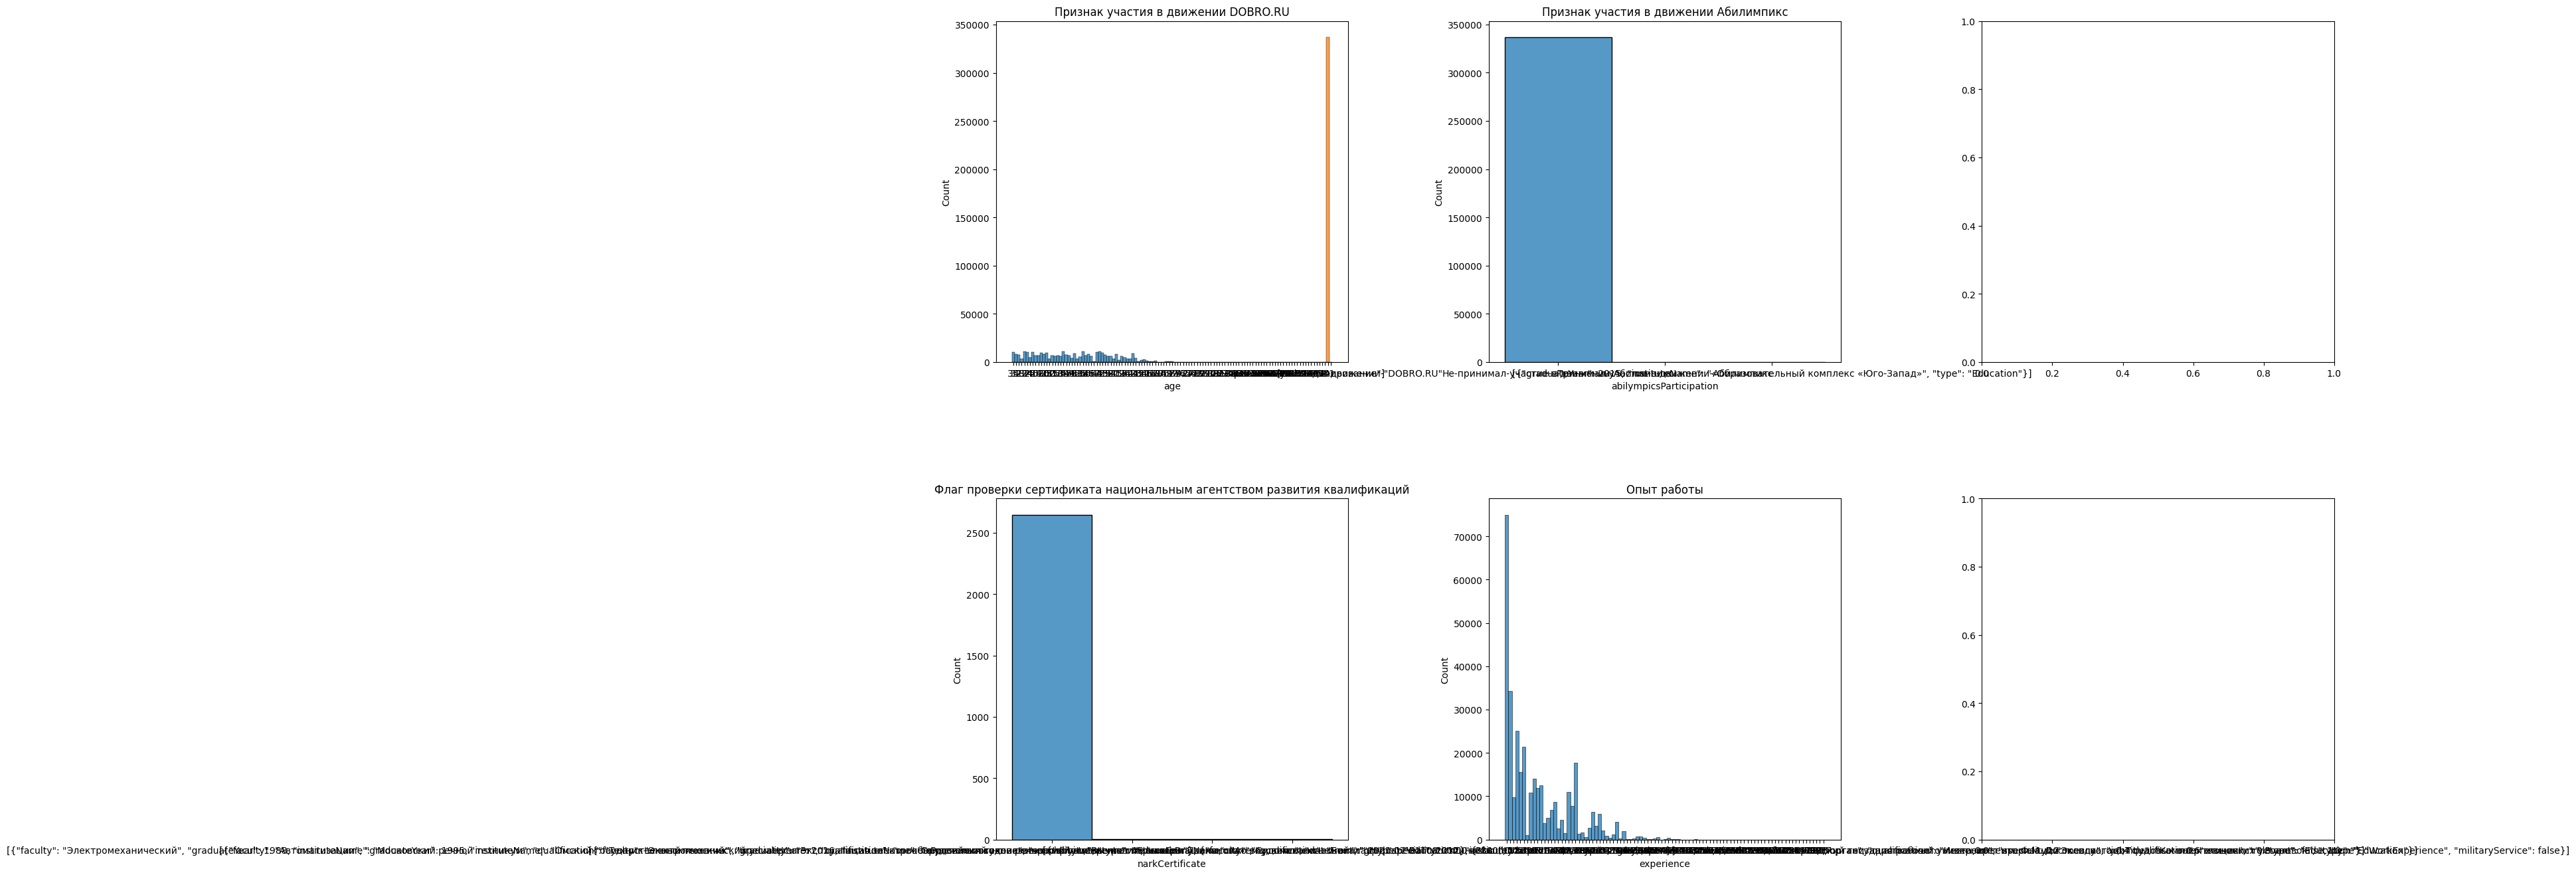

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(26,16))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

with open('./data/cv_attributes.json', 'r') as f:
    attr_data = json.load(f)

    i = 0
    for attr in tqdm(list(cv_df.columns)):
        if (not find_name(attr, attr_data)):
            continue

        attr_name, attr_type = find_name(attr, attr_data)
        sns.histplot(cv_df[attr], ax=axs[i // 3][i % 2])
        axs[i // 3][i % 2].set_title(attr_name)
        i += 1

print('Rendering', i)